In [1]:
!python -m pip install --user --upgrade pip
!pip install --user keras
!pip install --user tensorflow
!pip install --user -U numpy

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


  Stored in directory: C:\Users\mayingzh\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Stored in directory: C:\Users\mayingzh\AppData\Local\pip\Cache\wheels\5c\2e\7e\a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
  Stored in directory: C:\Users\mayingzh\AppData\Local\pip\Cache\wheels\ee\98\38\46cbcc5a93cfea5492d19c38562691ddb23b940176c14f7b48
Successfully built termcolor gast absl-py


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from sklearn import preprocessing
import matplotlib.pyplot as plt

C:\Program Files\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Load data and do data normalization

In [2]:
df = pd.read_csv('Cleaned_withoutNaN.csv')
df.drop(['Unnamed: 0', 'Open Interest for the Option', 'The Date of this Price', 'Expiration Date of the Option'], axis = 1, inplace = True)

In [3]:
df.head()

,Strike Price,Lowest Closing Ask Across All Exchanges,Implied Volatility of the Option,Underlying Price,maturity,"C=Call, P=Put_C","C=Call, P=Put_P"
0,590.0,85.50,0.636391,674.97,3,1,0
1,610.0,65.45,0.495483,674.97,3,1,0
2,615.0,60.25,0.408294,674.97,3,1,0
3,620.0,55.25,0.376411,674.97,3,1,0
4,625.0,50.25,0.363375,674.97,3,1,0


In [4]:
y = df['Lowest  Closing Ask Across All Exchanges'].values
df.drop(['Lowest  Closing Ask Across All Exchanges'], axis = 1, inplace = True)

In [6]:
# Normalize the data to build a regression neural network model
sc= preprocessing.MinMaxScaler()
X= sc.fit_transform(df)
y= y.reshape(-1,1)
y=sc.fit_transform(y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
print(X_train.shape)
print(y_train.shape)

(487123, 6)
(487123, 1)


In [8]:
#XX_train, XX_validation, yy_train, yy_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## Build a keras Sequential model

In [31]:
# Built Keras sequential model with 3 hidden layer, and after the first hidden layer, dropout 25% neurons.
model = Sequential([
    Dense(64, activation='relu', input_shape=(6,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear'),
])

In [32]:
# Enable early stopping based on the loss of validation data
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=50)

In [11]:
# Because it is a simple regression problem, we should custom metrics function
from keras import backend as K
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis = -1))

def r_square(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

In [33]:
# use mean_squared_error to compile regression model loss
model.compile(
  optimizer='adam',
  loss='mse',
  metrics=[rmse, r_square],
)

In [34]:
# fit the model
result = model.fit(X_train, 
                   y_train,
                   epochs = 200,
                   batch_size=256,
                   validation_data=(X_test, y_test),
                   callbacks = [es]
                  )

Train on 487123 samples, validate on 239927 samples
Epoch 1/200
487123/487123 [==============================] - 3s 7us/step - loss: 4.5229e-04 - rmse: 0.0077 - r_square: 0.9821 - val_loss: 6.0664e-05 - val_rmse: 0.0049 - val_r_square: 0.9975
Epoch 2/200
487123/487123 [==============================] - 3s 6us/step - loss: 2.6905e-05 - rmse: 0.0036 - r_square: 0.9989 - val_loss: 3.7201e-05 - val_rmse: 0.0047 - val_r_square: 0.9985
Epoch 3/200
487123/487123 [==============================] - 3s 6us/step - loss: 1.7087e-05 - rmse: 0.0029 - r_square: 0.9993 - val_loss: 2.3812e-05 - val_rmse: 0.0040 - val_r_square: 0.9990
Epoch 4/200
487123/487123 [==============================] - 3s 6us/step - loss: 1.3028e-05 - rmse: 0.0026 - r_square: 0.9995 - val_loss: 7.1861e-06 - val_rmse: 0.0019 - val_r_square: 0.9997
Epoch 5/200
487123/487123 [==============================] - 3s 6us/step - loss: 1.4173e-05 - rmse: 0.0024 - r_square: 0.9994 - val_loss: 5.1523e-06 - val_rmse: 0.0016 - val_r_square: 

Epoch 43/200
487123/487123 [==============================] - 3s 6us/step - loss: 1.6361e-06 - rmse: 8.6314e-04 - r_square: 0.9999 - val_loss: 1.8090e-06 - val_rmse: 8.8276e-04 - val_r_square: 0.9999
Epoch 44/200
487123/487123 [==============================] - 3s 6us/step - loss: 1.7165e-06 - rmse: 8.7436e-04 - r_square: 0.9999 - val_loss: 1.0365e-06 - val_rmse: 6.8585e-04 - val_r_square: 1.0000
Epoch 45/200
487123/487123 [==============================] - 3s 6us/step - loss: 1.7056e-06 - rmse: 8.7164e-04 - r_square: 0.9999 - val_loss: 1.7651e-06 - val_rmse: 0.0010 - val_r_square: 0.9999
Epoch 46/200
487123/487123 [==============================] - 3s 6us/step - loss: 1.5650e-06 - rmse: 8.3403e-04 - r_square: 0.9999 - val_loss: 1.5877e-06 - val_rmse: 8.7818e-04 - val_r_square: 0.9999
Epoch 47/200
487123/487123 [==============================] - 3s 6us/step - loss: 1.6592e-06 - rmse: 8.6192e-04 - r_square: 0.9999 - val_loss: 1.4115e-06 - val_rmse: 8.2919e-04 - val_r_square: 0.9999
Epoc

Epoch 125/200
487123/487123 [==============================] - 3s 6us/step - loss: 1.0515e-06 - rmse: 6.6591e-04 - r_square: 1.0000 - val_loss: 7.3642e-07 - val_rmse: 5.7498e-04 - val_r_square: 1.0000
Epoch 126/200
487123/487123 [==============================] - 3s 6us/step - loss: 1.1308e-06 - rmse: 6.8841e-04 - r_square: 1.0000 - val_loss: 8.8690e-07 - val_rmse: 6.1736e-04 - val_r_square: 1.0000
Epoch 127/200
487123/487123 [==============================] - 3s 6us/step - loss: 1.0801e-06 - rmse: 6.7411e-04 - r_square: 1.0000 - val_loss: 6.8010e-07 - val_rmse: 5.4489e-04 - val_r_square: 1.0000
Epoch 128/200
487123/487123 [==============================] - 3s 6us/step - loss: 1.1159e-06 - rmse: 6.8319e-04 - r_square: 1.0000 - val_loss: 1.2348e-06 - val_rmse: 7.7387e-04 - val_r_square: 0.9999
Epoch 129/200
487123/487123 [==============================] - 3s 6us/step - loss: 1.0613e-06 - rmse: 6.6457e-04 - r_square: 1.0000 - val_loss: 1.0822e-06 - val_rmse: 6.6602e-04 - val_r_square: 1.

Epoch 166/200
487123/487123 [==============================] - 3s 6us/step - loss: 9.7912e-07 - rmse: 6.3707e-04 - r_square: 1.0000 - val_loss: 1.1669e-06 - val_rmse: 7.1193e-04 - val_r_square: 1.0000
Epoch 167/200
487123/487123 [==============================] - 3s 6us/step - loss: 9.8182e-07 - rmse: 6.4276e-04 - r_square: 1.0000 - val_loss: 6.8825e-07 - val_rmse: 5.0755e-04 - val_r_square: 1.0000
Epoch 168/200
487123/487123 [==============================] - 3s 6us/step - loss: 9.9172e-07 - rmse: 6.3900e-04 - r_square: 1.0000 - val_loss: 9.5825e-07 - val_rmse: 6.3045e-04 - val_r_square: 1.0000
Epoch 169/200
487123/487123 [==============================] - 3s 6us/step - loss: 1.0248e-06 - rmse: 6.4653e-04 - r_square: 1.0000 - val_loss: 1.2472e-06 - val_rmse: 7.9566e-04 - val_r_square: 0.9999
Epoch 170/200
487123/487123 [==============================] - 3s 6us/step - loss: 1.0498e-06 - rmse: 6.5114e-04 - r_square: 1.0000 - val_loss: 9.4220e-07 - val_rmse: 6.8352e-04 - val_r_square: 1.

In [24]:
model.save_weights('model.h5')

In [35]:
predictions = model.predict(X_test)
print(predictions[:10])

[[ 4.2696994e-02]
 [ 3.7414992e-01]
 [ 1.3007532e-01]
 [ 4.9810112e-02]
 [ 3.1291690e-02]
 [ 1.6660685e-02]
 [ 5.7047880e-01]
 [-1.6936648e-04]
 [ 8.9563470e-04]
 [ 1.9883688e-01]]


In [24]:
y_test[:10]

array([[4.29719291e-02],
       [3.73104071e-01],
       [1.29315320e-01],
       [5.07406147e-02],
       [3.17998195e-02],
       [1.70023232e-02],
       [5.70946596e-01],
       [4.43924888e-05],
       [9.76634753e-04],
       [1.98123677e-01]])

## Plot learning curves including R^2 and RMSE

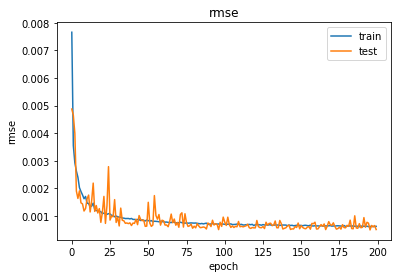

In [36]:
# plot training curve for rmse
plt.plot(result.history['rmse'])
plt.plot(result.history['val_rmse'])
plt.title('rmse')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

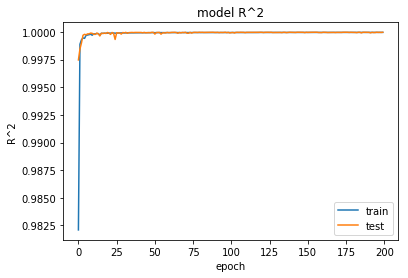

In [37]:
# plot training curve for R^2
plt.plot(result.history['r_square'])
plt.plot(result.history['val_r_square'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [42]:
import sklearn.metrics as skm, math
print("\n")
print("Mean absolute error (MAE):      %f" % skm.mean_absolute_error(y_test,predictions))
print("Mean squared error (MSE):       %f" % skm.mean_squared_error(y_test,predictions))
print("Root mean squared error (RMSE): %f" % math.sqrt(sklearn.metrics.mean_squared_error(y_test,predictions)))
print("R square (R^2):                 %f" % skm.r2_score(y_test,predictions))



Mean absolute error (MAE):      0.000509
Mean squared error (MSE):       0.000001
Root mean squared error (RMSE): 0.000811
R square (R^2):                 0.999973


## Try dropout

In [29]:
model2 = Sequential([
    Dense(64, activation='relu', input_shape=(6,)),
    Dropout(0.1),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear'),
])
model2.compile(
  optimizer='adam',
  loss='mse',
  metrics=[rmse, r_square],
)
# fit the model
result2 = model2.fit(X_train, 
                   y_train,
                   epochs = 200,
                   batch_size=256,
                   validation_data=(X_test, y_test),
                   callbacks = [es]
                  )

Train on 487123 samples, validate on 239927 samples
Epoch 1/200
487123/487123 [==============================] - 3s 7us/step - loss: 8.1509e-04 - rmse: 0.0152 - r_square: 0.9663 - val_loss: 3.6486e-04 - val_rmse: 0.0120 - val_r_square: 0.9851
Epoch 2/200
487123/487123 [==============================] - 3s 7us/step - loss: 9.8044e-05 - rmse: 0.0066 - r_square: 0.9960 - val_loss: 6.8964e-04 - val_rmse: 0.0177 - val_r_square: 0.9717
Epoch 3/200
487123/487123 [==============================] - 3s 7us/step - loss: 5.4191e-05 - rmse: 0.0050 - r_square: 0.9978 - val_loss: 9.2445e-04 - val_rmse: 0.0192 - val_r_square: 0.9621
Epoch 4/200
487123/487123 [==============================] - 3s 7us/step - loss: 3.8468e-05 - rmse: 0.0041 - r_square: 0.9984 - val_loss: 6.8090e-04 - val_rmse: 0.0167 - val_r_square: 0.9721
Epoch 5/200
487123/487123 [==============================] - 3s 7us/step - loss: 3.2426e-05 - rmse: 0.0037 - r_square: 0.9987 - val_loss: 8.1807e-04 - val_rmse: 0.0173 - val_r_square: 

In [30]:
predictions2 = model2.predict(X_test)
print(predictions2[:10])
print("\n")
print("Mean absolute error (MAE):      %f" % skm.mean_absolute_error(y_test,predictions2))
print("Mean squared error (MSE):       %f" % skm.mean_squared_error(y_test,predictions2))
print("Root mean squared error (RMSE): %f" % math.sqrt(sklearn.metrics.mean_squared_error(y_test,predictions2)))
print("R square (R^2):                 %f" % skm.r2_score(y_test,predictions2))

[[4.5972891e-02]
 [3.7647626e-01]
 [1.0803577e-01]
 [3.7441004e-02]
 [3.8380090e-02]
 [4.9043383e-02]
 [5.0099188e-01]
 [2.2799615e-04]
 [3.0210556e-03]
 [2.1721044e-01]]


Mean absolute error (MAE):      0.013301
Mean squared error (MSE):       0.000484
Root mean squared error (RMSE): 0.022002
R square (R^2):                 0.980362


## Try batch normalization technique to regularize neurons

In [40]:
from keras.layers.normalization import BatchNormalization
model3 = Sequential([
    BatchNormalization(),
    Dense(64, activation='relu', input_shape=(6,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear'),
])
model3.compile(
  optimizer='adam',
  loss='mse',
  metrics=[rmse, r_square],
)
# fit the model
result3 = model3.fit(X_train, 
                   y_train,
                   epochs = 200,
                   batch_size=256,
                   validation_data=(X_test, y_test),
                   callbacks = [es]
                  )

Train on 487123 samples, validate on 239927 samples
Epoch 1/200
487123/487123 [==============================] - 4s 8us/step - loss: 0.0010 - rmse: 0.0176 - r_square: 0.9569 - val_loss: 1.4472e-04 - val_rmse: 0.0078 - val_r_square: 0.9940
Epoch 2/200
487123/487123 [==============================] - 3s 7us/step - loss: 3.5415e-04 - rmse: 0.0125 - r_square: 0.9854 - val_loss: 6.6277e-05 - val_rmse: 0.0060 - val_r_square: 0.9973
Epoch 3/200
487123/487123 [==============================] - 3s 7us/step - loss: 3.1503e-04 - rmse: 0.0114 - r_square: 0.9871 - val_loss: 1.5766e-04 - val_rmse: 0.0077 - val_r_square: 0.9935
Epoch 4/200
487123/487123 [==============================] - 3s 7us/step - loss: 3.0017e-04 - rmse: 0.0109 - r_square: 0.9877 - val_loss: 1.3407e-04 - val_rmse: 0.0090 - val_r_square: 0.9944
Epoch 5/200
487123/487123 [==============================] - 3s 7us/step - loss: 2.9197e-04 - rmse: 0.0109 - r_square: 0.9880 - val_loss: 1.4660e-04 - val_rmse: 0.0089 - val_r_square: 0.99

Epoch 86/200
487123/487123 [==============================] - 3s 7us/step - loss: 2.1264e-04 - rmse: 0.0090 - r_square: 0.9912 - val_loss: 2.0521e-05 - val_rmse: 0.0029 - val_r_square: 0.9992
Epoch 87/200
487123/487123 [==============================] - 3s 7us/step - loss: 2.2124e-04 - rmse: 0.0091 - r_square: 0.9909 - val_loss: 1.7220e-05 - val_rmse: 0.0027 - val_r_square: 0.9993
Epoch 88/200
487123/487123 [==============================] - 3s 7us/step - loss: 2.0725e-04 - rmse: 0.0088 - r_square: 0.9915 - val_loss: 3.5184e-05 - val_rmse: 0.0041 - val_r_square: 0.9986
Epoch 89/200
487123/487123 [==============================] - 3s 7us/step - loss: 2.1255e-04 - rmse: 0.0090 - r_square: 0.9913 - val_loss: 2.6888e-05 - val_rmse: 0.0031 - val_r_square: 0.9989
Epoch 90/200
487123/487123 [==============================] - 3s 7us/step - loss: 2.0636e-04 - rmse: 0.0088 - r_square: 0.9915 - val_loss: 1.9418e-05 - val_rmse: 0.0028 - val_r_square: 0.9992
Epoch 91/200
487123/487123 [============

In [43]:
predictions3 = model3.predict(X_test)
print(predictions3[:10])
print("\n")
print("Mean absolute error (MAE):      %f" % skm.mean_absolute_error(y_test,predictions3))
print("Mean squared error (MSE):       %f" % skm.mean_squared_error(y_test,predictions3))
print("Root mean squared error (RMSE): %f" % math.sqrt(sklearn.metrics.mean_squared_error(y_test,predictions3)))
print("R square (R^2):                 %f" % skm.r2_score(y_test,predictions3))

[[ 0.04051611]
 [ 0.34659985]
 [ 0.12310097]
 [ 0.05491048]
 [ 0.02672598]
 [ 0.01006674]
 [ 0.5663377 ]
 [-0.00239683]
 [-0.00114246]
 [ 0.18679872]]


Mean absolute error (MAE):      0.003646
Mean squared error (MSE):       0.000030
Root mean squared error (RMSE): 0.005486
R square (R^2):                 0.998779


## Reference: 
&emsp;&emsp;What does 'Accuracy' mean in Regression? https://github.com/keras-team/keras/issues/7947 <br>
&emsp;&emsp;https://keras.io/metrics/<br>
&emsp;&emsp;Scale, Standardize, or Normalize with Scikit-Learn https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02 <br>
&emsp;&emsp;The Day my Computer Won the Nobel Prize (Neural Network Option Pricing)  https://medium.com/datadriveninvestor/the-day-my-computer-won-the-nobel-prize-neural-network-option-pricing-d29b4379f1d2 <br>